In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [5]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [6]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [17]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [19]:
extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))

In [25]:
!ls

copy_data.py			   runme.sh
extracted_contrib_scores.npy	   sparserun_l6g2m0_results.hdf5
extracted_hypothetical_scores.npy  sparserun_results.hdf5
extracted_onehot.npy		   subsample_data.py
myrun_results.hdf5		   trial1.deeplift.imp_score.h5
presparserun_l8g3m2_results.hdf5   trial1.modisco.h5
presparserun_results.hdf5	   TryBpNet.ipynb


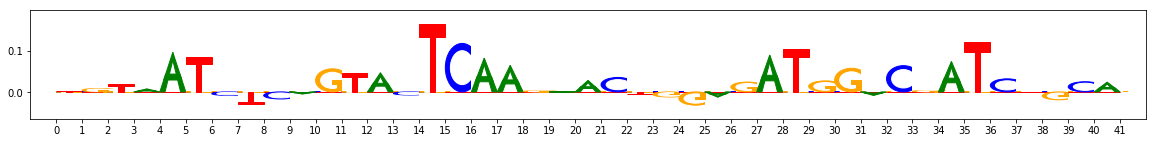

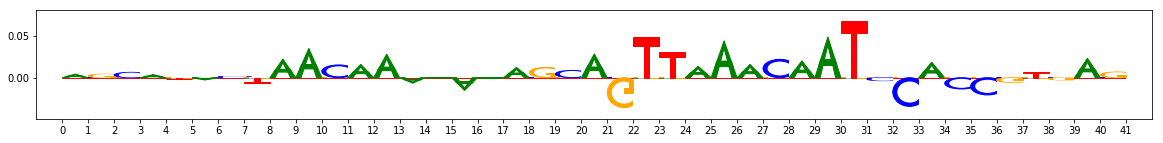

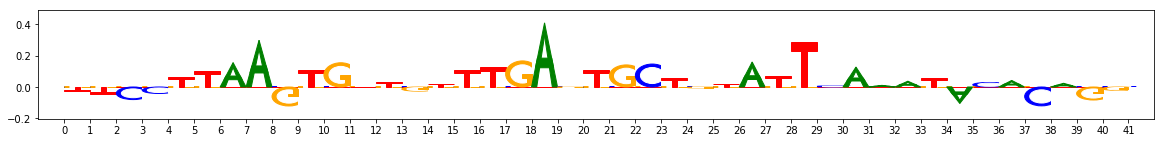

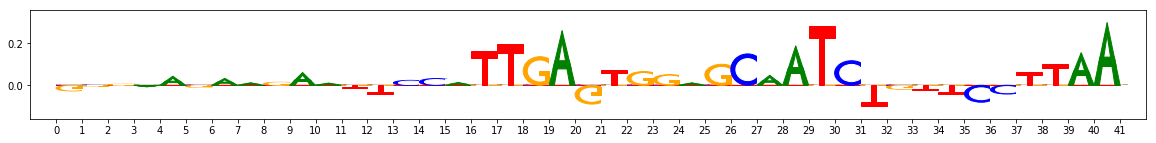

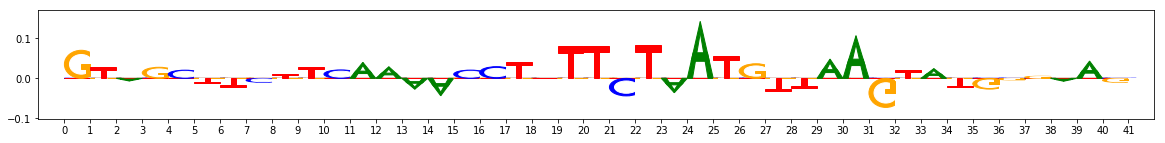

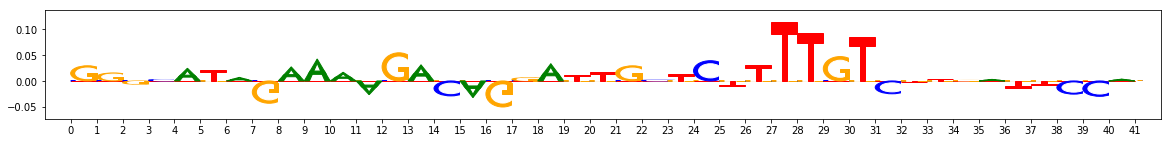

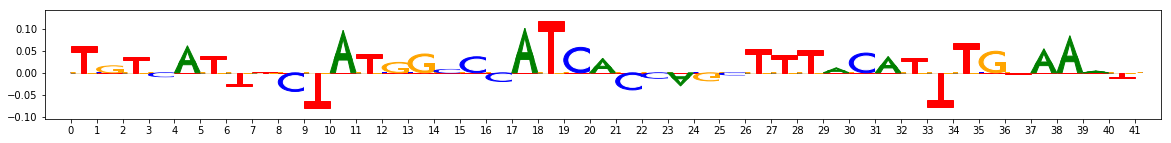

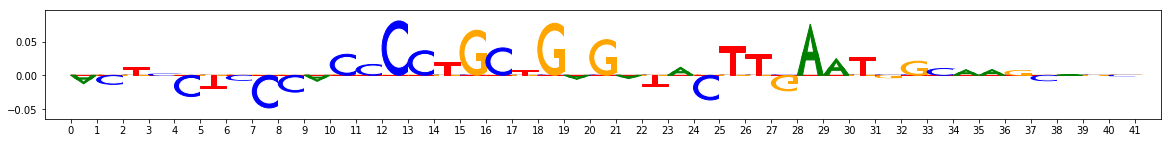

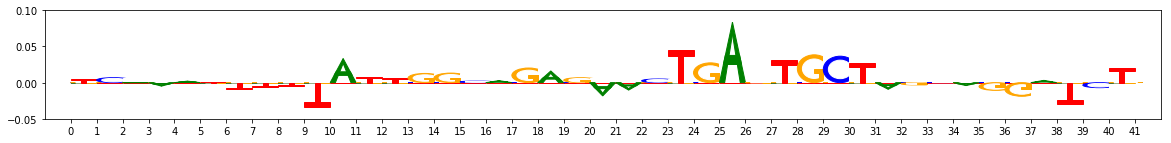

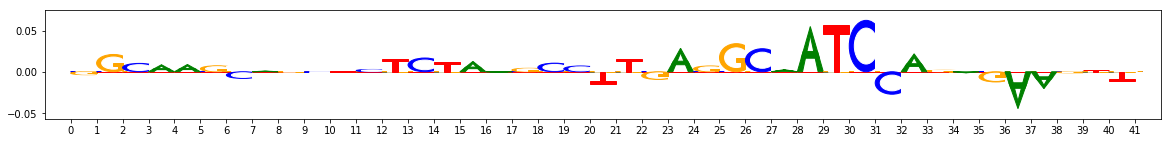

In [9]:
for i in range(10):
    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

pattern idx 0
4011


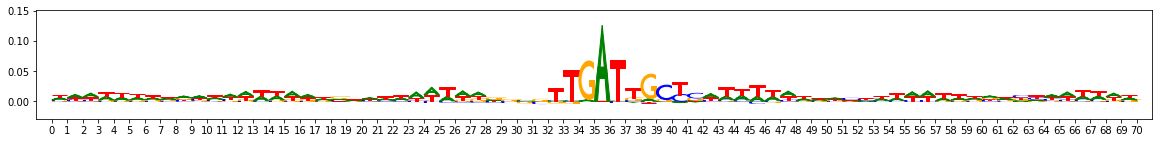

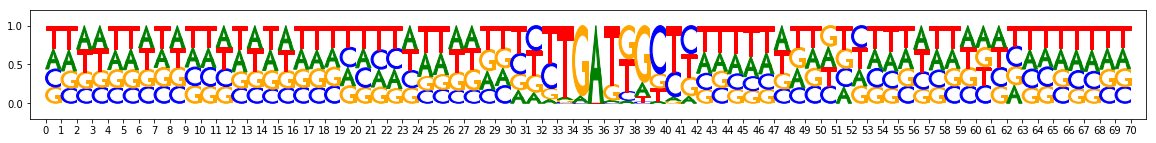

pattern idx 1
2215


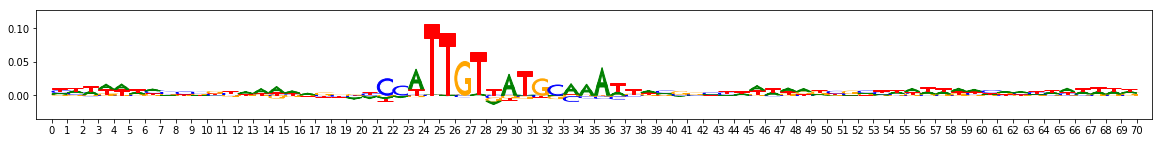

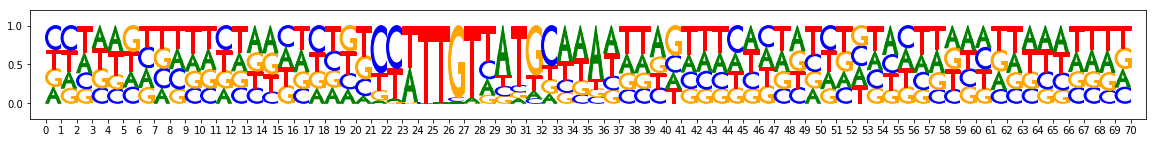

pattern idx 2
1854


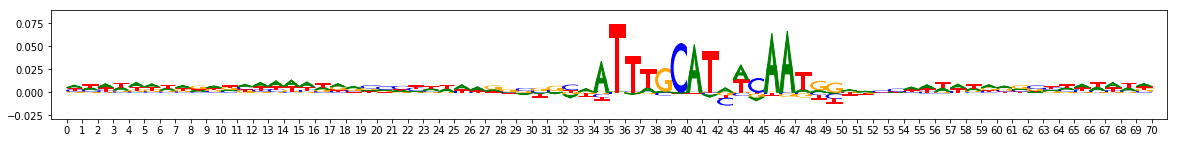

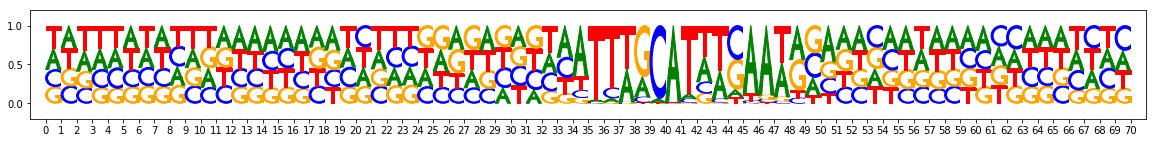

pattern idx 3
1636


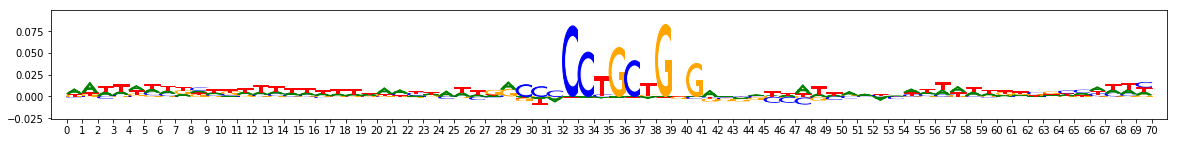

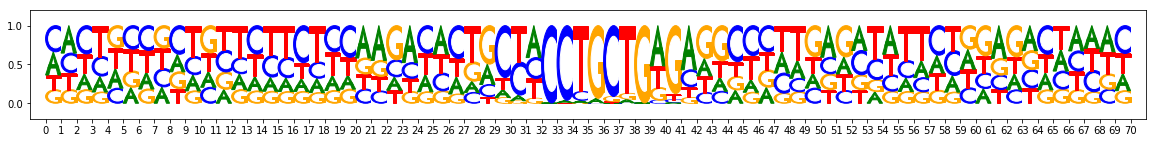

pattern idx 4
937


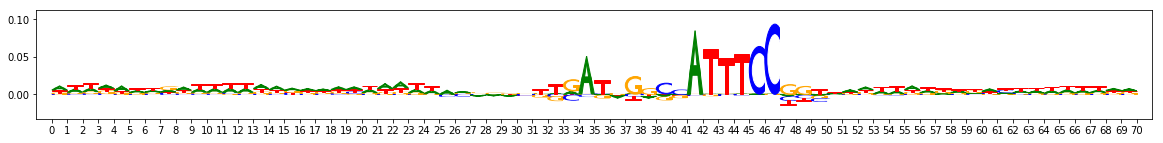

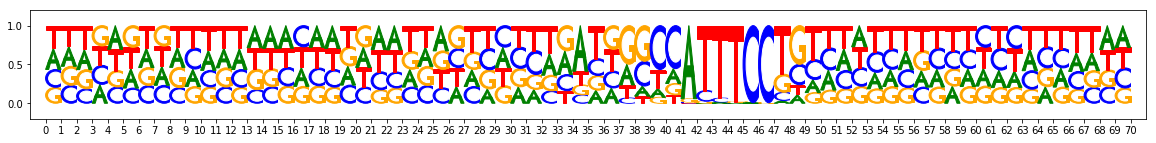

pattern idx 5
749


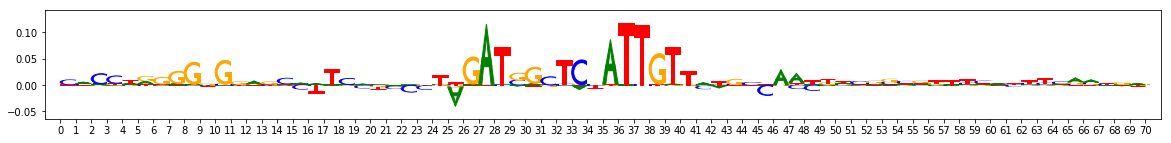

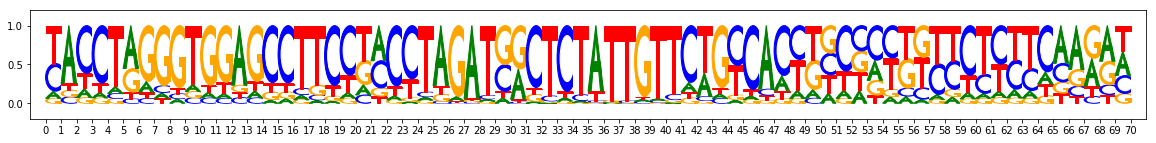

pattern idx 6
466


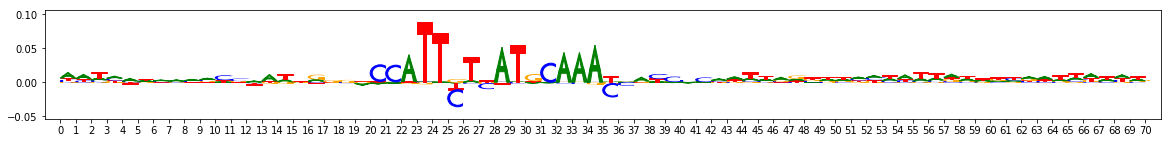

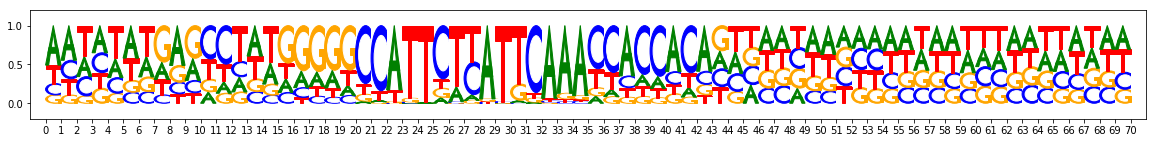

pattern idx 7
231


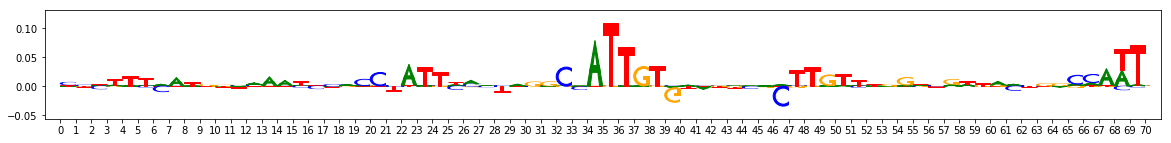

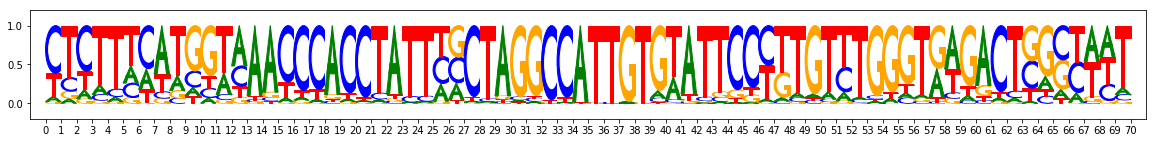

pattern idx 8
191


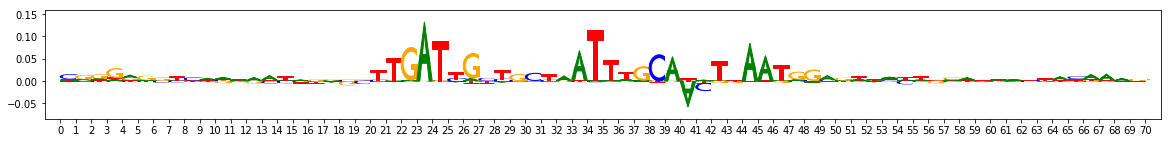

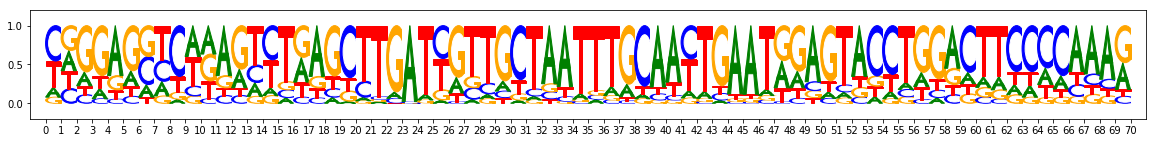

pattern idx 9
187


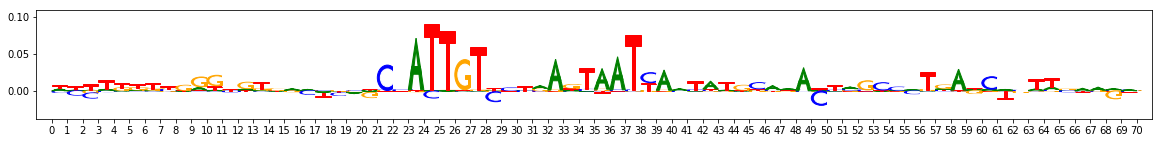

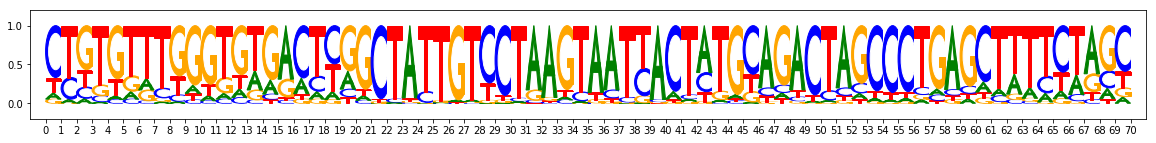

pattern idx 10
142


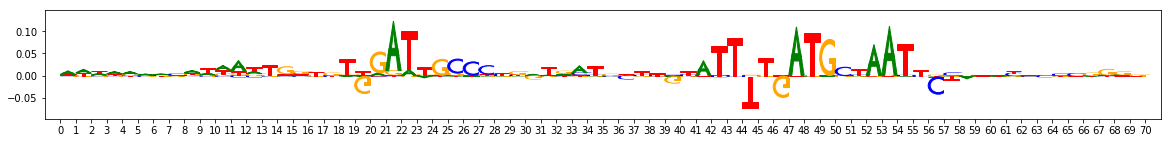

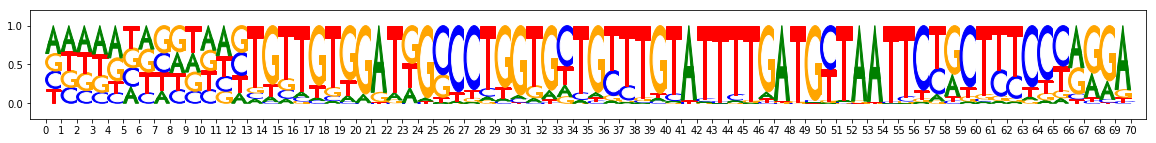

pattern idx 11
117


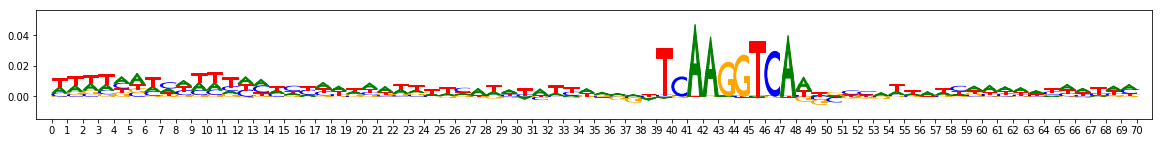

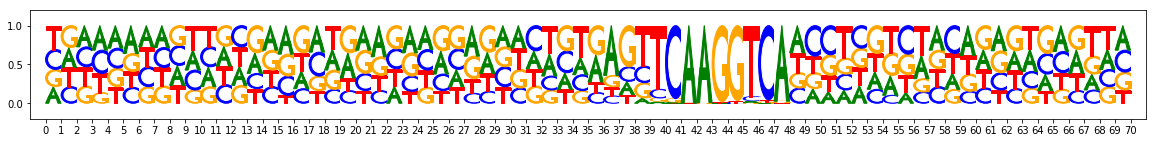

pattern idx 12
89


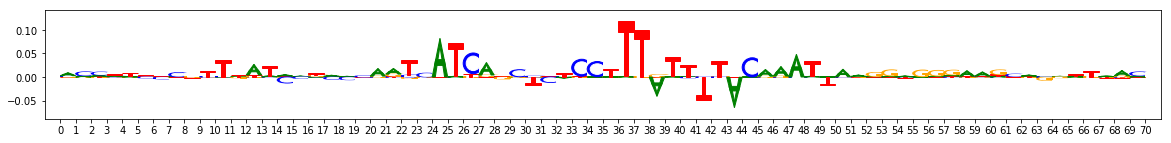

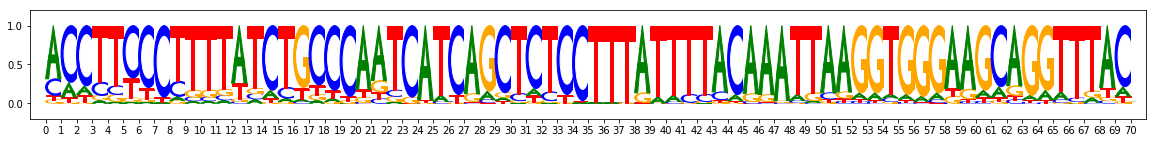

pattern idx 13
105


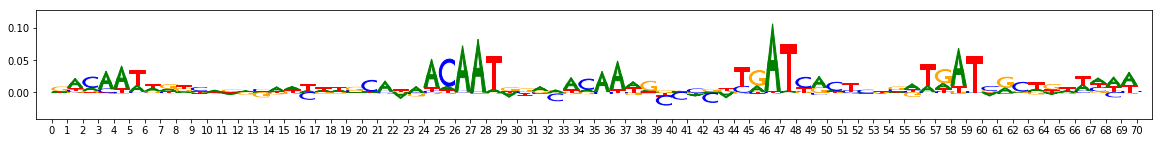

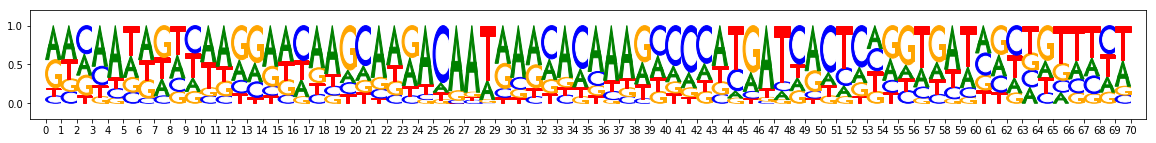

pattern idx 14
105


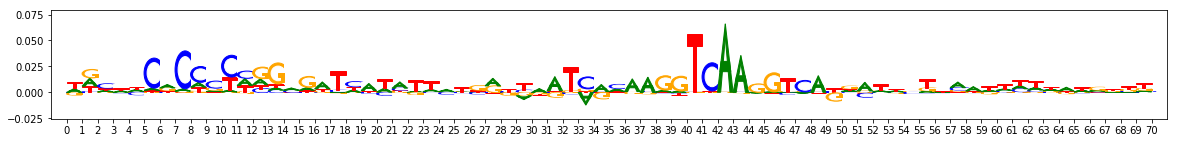

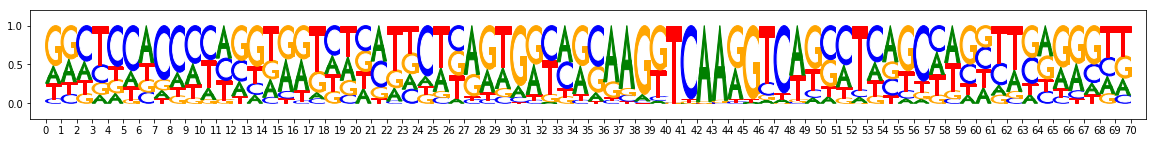

pattern idx 15
65


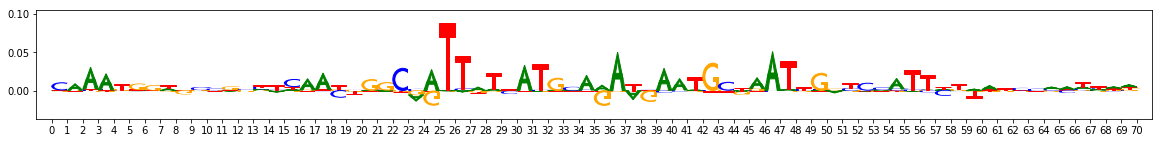

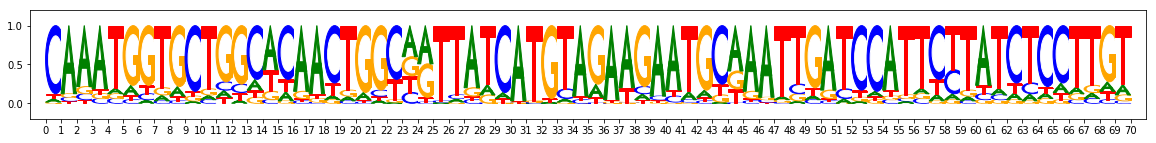

In [3]:
#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

TF-MoDISco is using the TensorFlow backend.


MEMORY 2.792083740234375 2019-12-24 15:53:55.154106
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


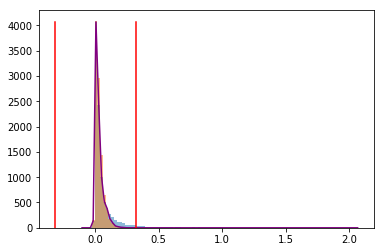

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9699998852203117
MEMORY 4.503444671630859 2019-12-24 16:01:18.925538
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 4.504062652587891 2019-12-24 16:01:32.095888
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)


W1224 16:01:32.151558 140055142909696 deprecation_wrapper.py:119] From /users/avanti/modisco_private/modisco/backend/tensorflow_backend.py:87: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



kmer embedding func instantiated
MEMORY 4.505470275878906 2019-12-24 16:01:32.188995
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 4.5055084228515625 2019-12-24 16:01:33.283189
Beginning embedding computation
MEMORY 4.5055084228515625 2019-12-24 16:01:33.283984
Computing embeddings
MEMORY 4.5055084228515625 2019-12-24 16:01:33.285846
After onehot_track_fwd and onehot_track_rev
MEMORY 4.505687713623047 2019-12-24 16:01:33.842430
data_to_embed_fwd and data_to_embed_rev instantiated
MEMORY 4.505687713623047 2019-12-24 16:01:33.904811
data_to_embed_fwd and data_to_embed_rev prepared shapes are (50000, 41, 4) and (50000, 41, 4)
MEMORY 4.505931854248047 2019-12-24 16:01:34.478495
data_to_embed_fwd and data_to_embed_rev normalized
MEMORY 4.505867004394531 2019-12-24 16:01:36.107330


Using TensorFlow backend.
W1224 16:01:36.322054 140055142909696 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1224 16:01:36.323210 140055142909696 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:184: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1224 16:01:36.324299 140055142909696 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1224 16:01:36.617564 140055142909696 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use 

embedding_fwd and embedding_rev prepared
MEMORY 8.12615966796875 2019-12-24 16:01:48.891366
Finished embeddings computation - intermediate vars in scope
MEMORY 8.12615966796875 2019-12-24 16:01:48.893184
Finished embedding computation in 16.09 s
MEMORY 8.12615966796875 2019-12-24 16:01:49.378704
Starting affinity matrix computations
MEMORY 8.12615966796875 2019-12-24 16:01:49.381560
Batching in slices of size 1342


100%|██████████| 38/38 [10:00<00:00, 15.79s/it]


Finished affinity matrix computations in 604.81 s
MEMORY 8.316028594970703 2019-12-24 16:11:54.191845
(Round 1) Computed coarse affmat
MEMORY 6.885051727294922 2019-12-24 16:11:54.690852
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 6.885051727294922 2019-12-24 16:11:54.692980
Launching nearest neighbors affmat calculation job
MEMORY 7.104499816894531 2019-12-24 16:12:03.076182
Parallel runs completed
MEMORY 7.677722930908203 2019-12-24 16:17:22.692775
Job completed in: 320.33 s
MEMORY 7.864360809326172 2019-12-24 16:17:23.402468
Launching nearest neighbors affmat calculation job
MEMORY 7.705078125 2019-12-24 16:17:23.734911
Parallel runs completed
MEMORY 7.940647125244141 2019-12-24 16:22:12.742445
Job completed in: 289.69 s
MEMORY 8.12728500366211 2019-12-24 16:22:13.427617
(Round 1) Computed affinity matrix on nearest neighbors in 662.38 s
MEMORY 7.684139251708984 2019-12-24 16:22:57.071707
Filtered down to 21446 of 50000
(Round 1) Retained 21446 rows out of 50000 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   19.3s


Louvain completed 200 runs in 21.69493865966797 seconds
MEMORY 7.977817535400391 2019-12-24 16:24:07.427351
Preparing sparse coo_matrix


[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   20.9s finished
200it [11:25,  3.43s/it]


Prepared sparse coo_matrix in  686.4364738464355 s
MEMORY 9.311405181884766 2019-12-24 16:35:33.865483
Transformed affinity matrix
MEMORY 8.783073425292969 2019-12-24 16:35:34.165504
Wrote graph to binary file in 113.77046537399292 seconds
MEMORY 10.393363952636719 2019-12-24 16:37:27.939235
Running Louvain modularity optimization
MEMORY 8.783073425292969 2019-12-24 16:37:28.030941
After 1 runs, maximum modularity is Q = 0.789045
MEMORY 8.783073425292969 2019-12-24 16:38:06.019986
After 2 runs, maximum modularity is Q = 0.790034
MEMORY 8.783073425292969 2019-12-24 16:38:10.561821
After 6 runs, maximum modularity is Q = 0.790844
MEMORY 8.783073425292969 2019-12-24 16:38:28.972198
After 11 runs, maximum modularity is Q = 0.792023
MEMORY 8.783073425292969 2019-12-24 16:38:51.141610
After 50 runs, maximum modularity is Q = 0.792443
MEMORY 8.783073425292969 2019-12-24 16:41:57.885452
After 65 runs, maximum modularity is Q = 0.793253
MEMORY 8.783073425292969 2019-12-24 16:43:06.541354
Louvai

100%|██████████| 6/6 [01:30<00:00, 15.02s/it]

Finished affinity matrix computations in 91.59 s
MEMORY 8.513351440429688 2019-12-24 16:50:29.085258


(Round 2) Computed coarse affmat
MEMORY 7.9308013916015625 2019-12-24 16:50:30.064761
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 7.9308013916015625 2019-12-24 16:50:30.066230
Launching nearest neighbors affmat calculation job
MEMORY 7.977802276611328 2019-12-24 16:50:33.238919
Parallel runs completed
MEMORY 8.111759185791016 2019-12-24 16:52:52.468954
Job completed in: 139.91 s
MEMORY 8.185344696044922 2019-12-24 16:52:53.147545
Launching nearest neighbors affmat calculation job
MEMORY 8.214599609375 2019-12-24 16:52:53.302826
Parallel runs completed
MEMORY 8.290084838867188 2019-12-24 16:55:12.001268
Job completed in: 139.34 s
MEMORY 8.363670349121094 2019-12-24 16:55:12.643663
(Round 2) Computed affinity matrix on nearest neighbors in 299.45 s
MEMORY 8.316787719726562 2019-12-24 16:55:29.521921
Not applying filtering for rounds above first round
MEMORY 8.316787719726562 2019-12-24 16:55:29.524233
(Round 2) Computing density adapted affmat
MEMORY 8.174327850341797

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   15.7s


Louvain completed 200 runs in 17.66322946548462 seconds
MEMORY 8.203384399414062 2019-12-24 16:56:03.423488
Preparing sparse coo_matrix


[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   16.9s finished
200it [09:57,  2.99s/it]


Prepared sparse coo_matrix in  599.2931849956512 s
MEMORY 9.486499786376953 2019-12-24 17:06:02.719149
Transformed affinity matrix
MEMORY 9.014354705810547 2019-12-24 17:06:03.039613
Wrote graph to binary file in 115.69610834121704 seconds
MEMORY 10.62270736694336 2019-12-24 17:07:58.739265
Running Louvain modularity optimization
MEMORY 9.014354705810547 2019-12-24 17:07:58.832079
After 1 runs, maximum modularity is Q = 0.761192
MEMORY 9.014354705810547 2019-12-24 17:08:33.176082
After 2 runs, maximum modularity is Q = 0.762784
MEMORY 9.014354705810547 2019-12-24 17:08:38.224238
After 16 runs, maximum modularity is Q = 0.763077
MEMORY 9.014354705810547 2019-12-24 17:09:43.031844
After 41 runs, maximum modularity is Q = 0.763172
MEMORY 9.014354705810547 2019-12-24 17:11:50.692632
Louvain completed 91 runs in 488.89032673835754 seconds
MEMORY 9.014354705810547 2019-12-24 17:16:07.725927
Got communities, graph, Q
MEMORY 9.014354705810547 2019-12-24 17:16:09.262573
Packaged as cluster resu

Running Louvain modularity optimization
MEMORY 8.238441467285156 2019-12-24 17:23:12.925283
After 1 runs, maximum modularity is Q = 0.00634296
MEMORY 8.238441467285156 2019-12-24 17:23:14.700447
After 2 runs, maximum modularity is Q = 0.00634552
MEMORY 8.238441467285156 2019-12-24 17:23:15.457860
Louvain completed 22 runs in 11.80320429801941 seconds
MEMORY 8.238441467285156 2019-12-24 17:23:24.732321
Similarity is 0.8075185; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 2.034367084503174 seconds
MEMORY 8.238441467285156 2019-12-24 17:23:29.765724
Running Louvain modularity optimization
MEMORY 8.238441467285156 2019-12-24 17:23:29.767749
After 1 runs, maximum modularity is Q = 0.0062611
MEMORY 8.238441467285156 2019-12-24 17:23:31.262253
After 2 runs, maximum modularity is Q = 0.00626117
MEMORY 8.238441467285156 2019-12-24 17:23:31.953984
Louvain completed 22 runs in 10.619600534439087 seconds
MEMORY 8.238441467285156 2019-12-24 17:23:40.389986
Si

Louvain completed 22 runs in 7.686483860015869 seconds
MEMORY 8.238445281982422 2019-12-24 17:25:27.622930
Similarity is 0.8262428; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.04148435592651367 seconds
MEMORY 8.238445281982422 2019-12-24 17:25:27.785531
Running Louvain modularity optimization
MEMORY 8.238445281982422 2019-12-24 17:25:27.787225
After 1 runs, maximum modularity is Q = 0.00706625
MEMORY 8.238445281982422 2019-12-24 17:25:28.652869
Louvain completed 21 runs in 6.861054420471191 seconds
MEMORY 8.238445281982422 2019-12-24 17:25:34.650328
Similarity is 0.8950039; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.02551412582397461 seconds
MEMORY 8.238445281982422 2019-12-24 17:25:34.740123
Running Louvain modularity optimization
MEMORY 8.238445281982422 2019-12-24 17:25:34.741636
After 1 runs, maximum modularity is Q = 0.0154295
MEMORY 8.238445281982422 2019-12-24 17:25:35.556585
Louvain completed

In [2]:
from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [3]:
import h5py
import modisco.util
reload(modisco.util)
!rm sparserun_l6g2m0_results.hdf5
grp = h5py.File("sparserun_l6g2m0_results.hdf5")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 5539
Task 0 hypothetical scores:


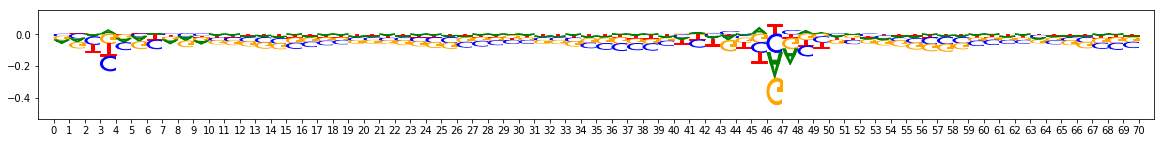

Task 0 actual importance scores:


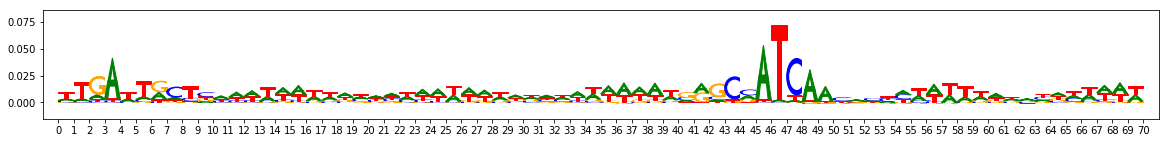

onehot, fwd and rev:


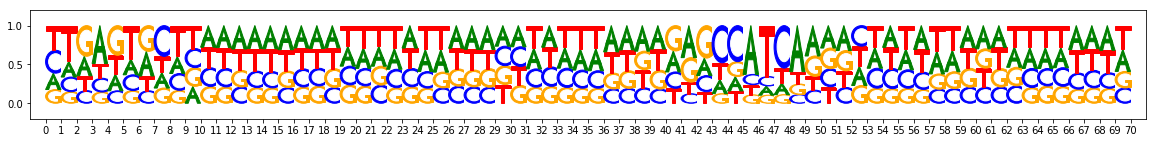

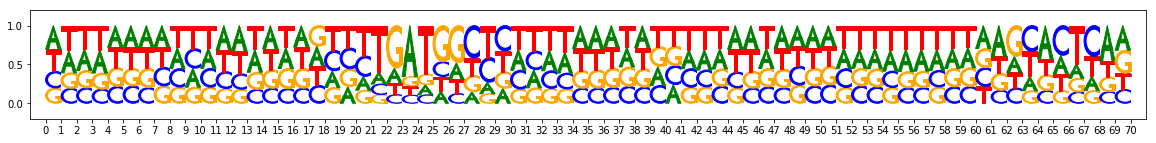

metacluster_0 pattern_1
total seqlets: 4647
Task 0 hypothetical scores:


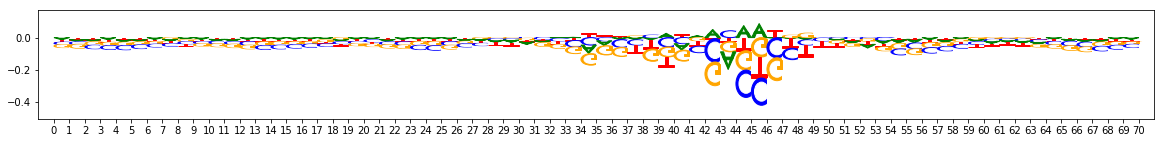

Task 0 actual importance scores:


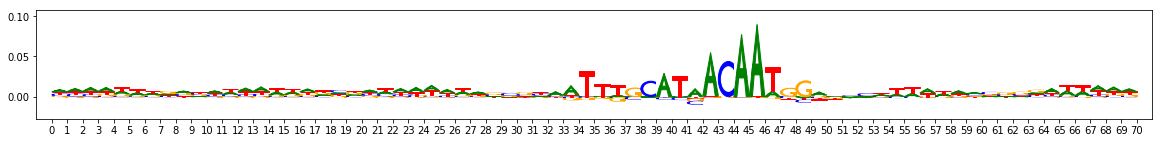

onehot, fwd and rev:


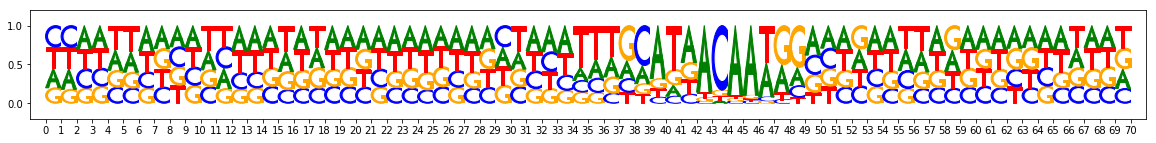

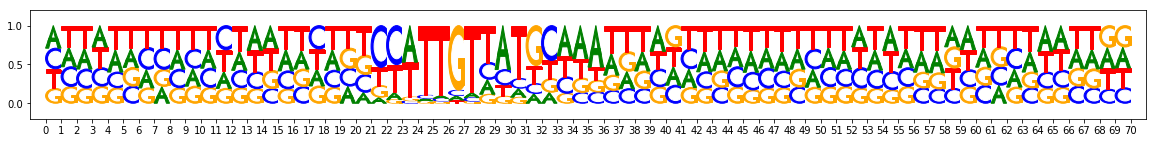

metacluster_0 pattern_2
total seqlets: 2834
Task 0 hypothetical scores:


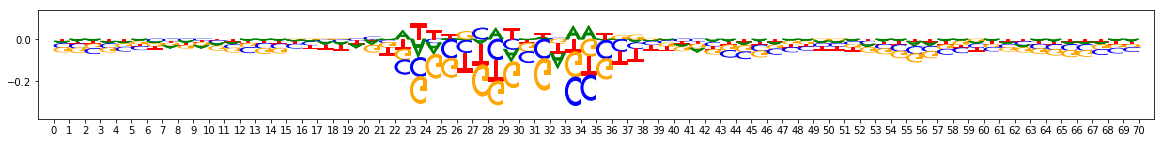

Task 0 actual importance scores:


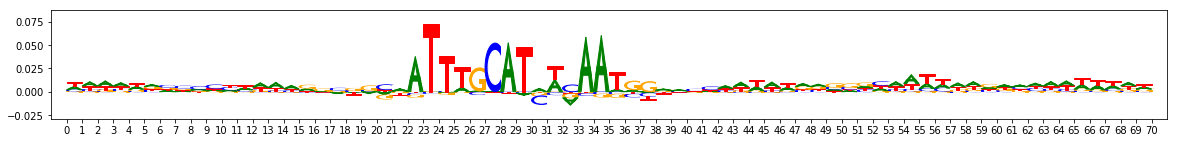

onehot, fwd and rev:


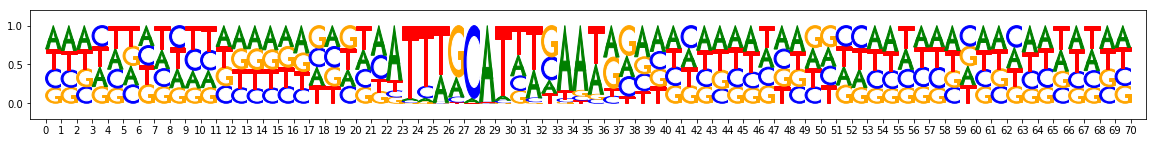

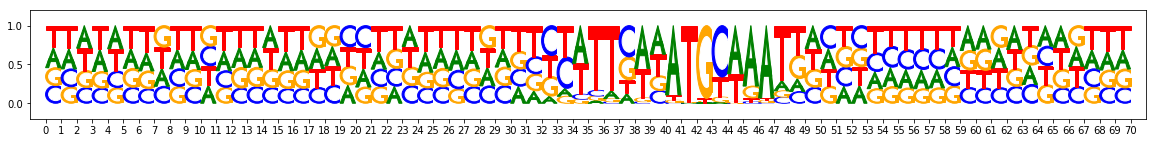

metacluster_0 pattern_3
total seqlets: 1573
Task 0 hypothetical scores:


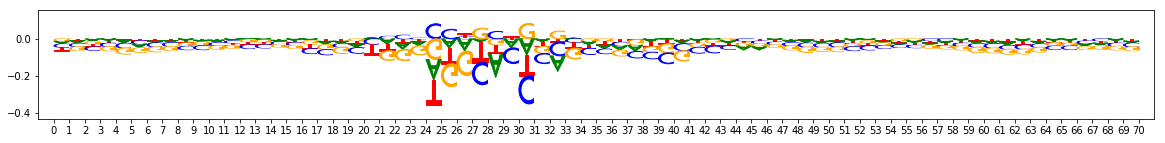

Task 0 actual importance scores:


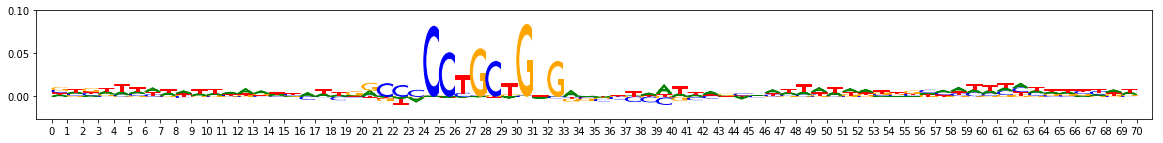

onehot, fwd and rev:


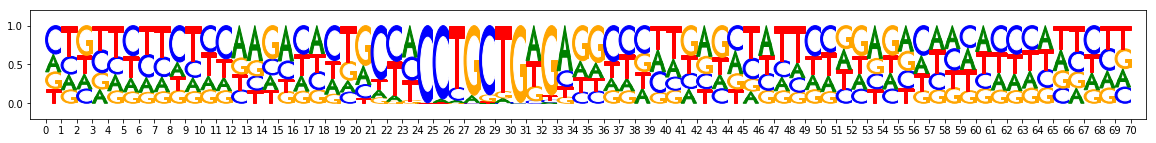

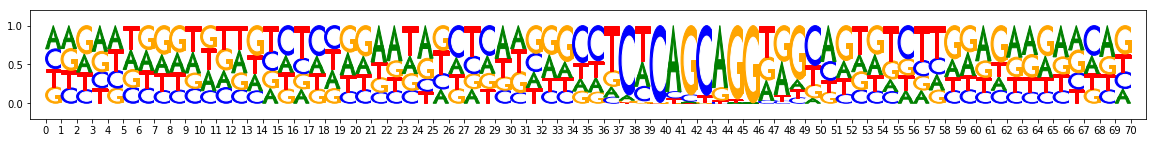

metacluster_0 pattern_4
total seqlets: 1091
Task 0 hypothetical scores:


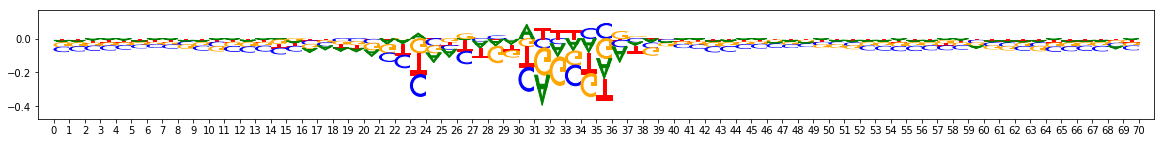

Task 0 actual importance scores:


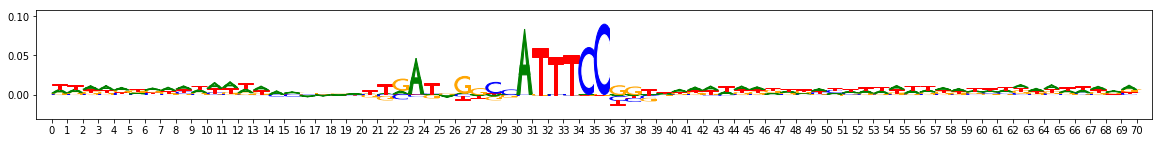

onehot, fwd and rev:


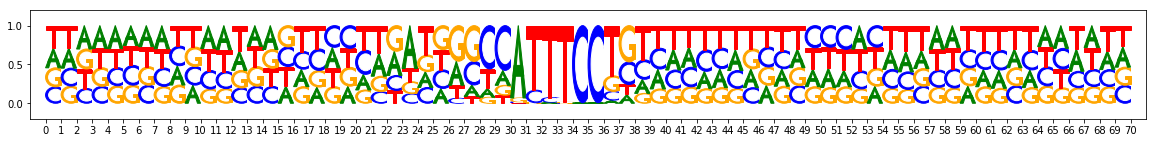

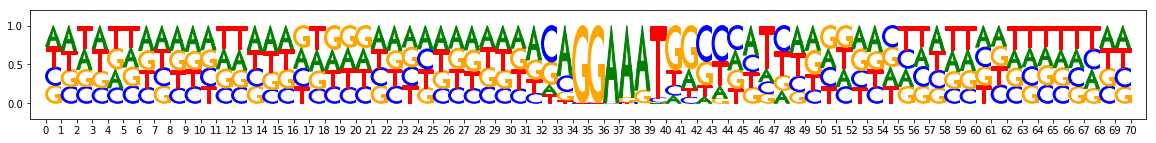

metacluster_0 pattern_5
total seqlets: 486
Task 0 hypothetical scores:


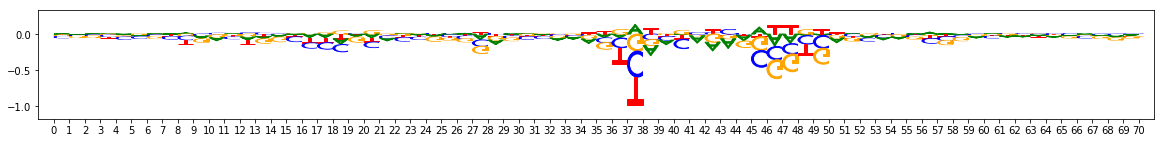

Task 0 actual importance scores:


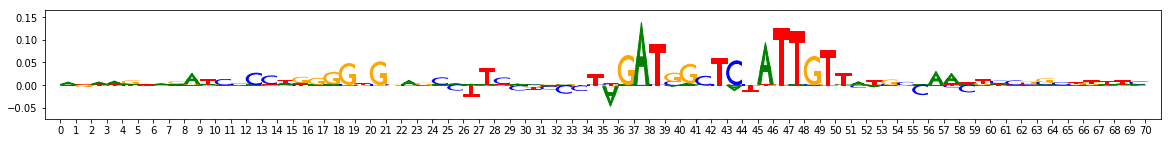

onehot, fwd and rev:


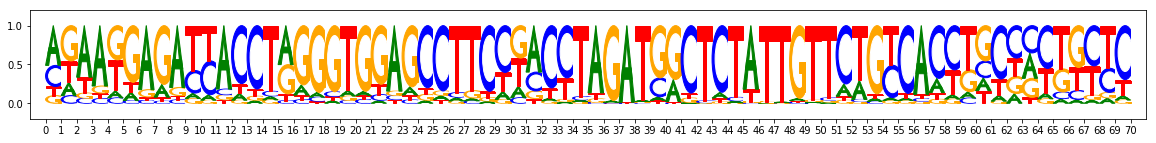

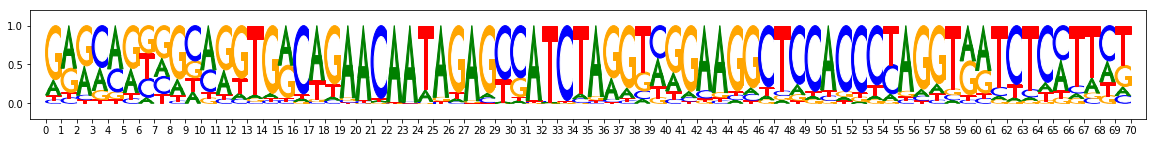

metacluster_0 pattern_6
total seqlets: 273
Task 0 hypothetical scores:


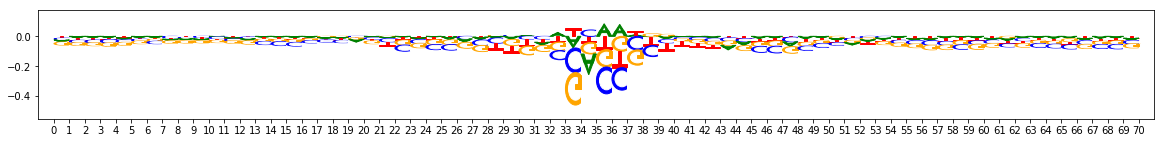

Task 0 actual importance scores:


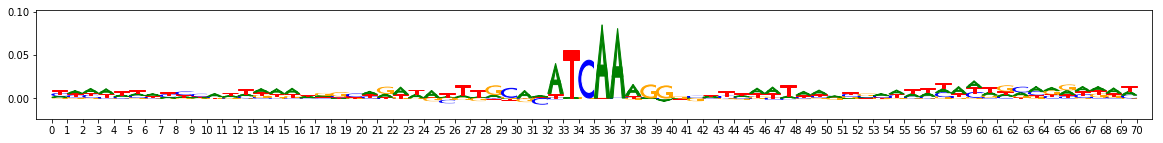

onehot, fwd and rev:


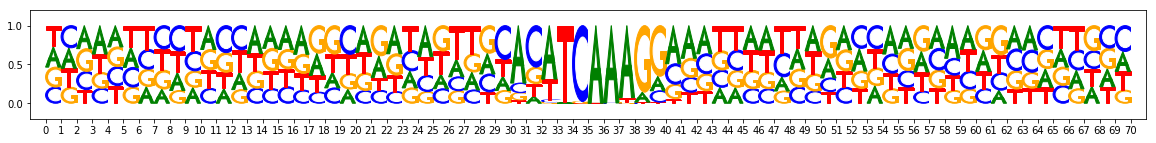

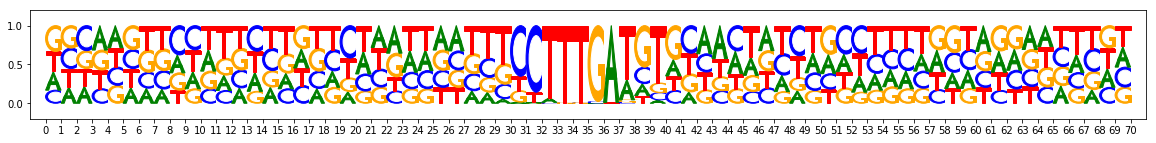

metacluster_0 pattern_7
total seqlets: 256
Task 0 hypothetical scores:


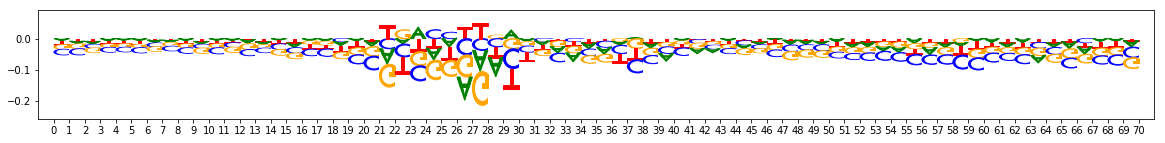

Task 0 actual importance scores:


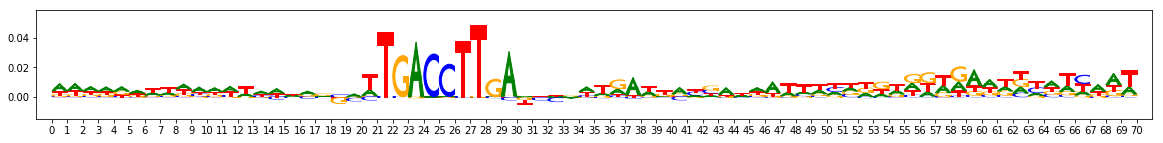

onehot, fwd and rev:


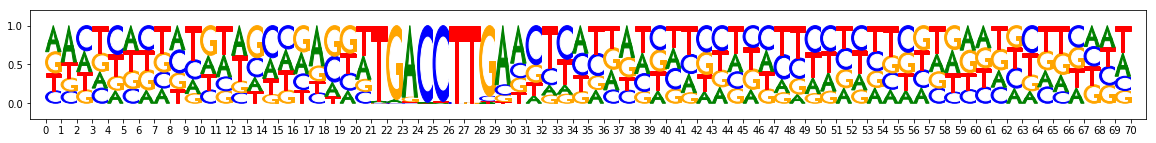

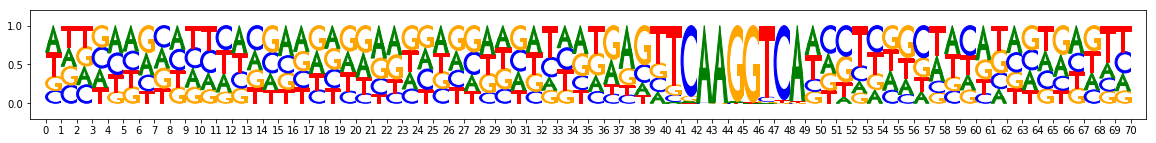

metacluster_0 pattern_8
total seqlets: 227
Task 0 hypothetical scores:


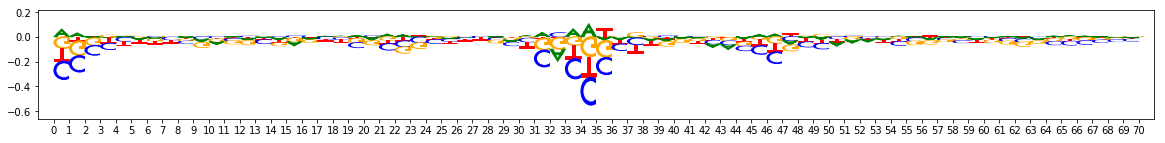

Task 0 actual importance scores:


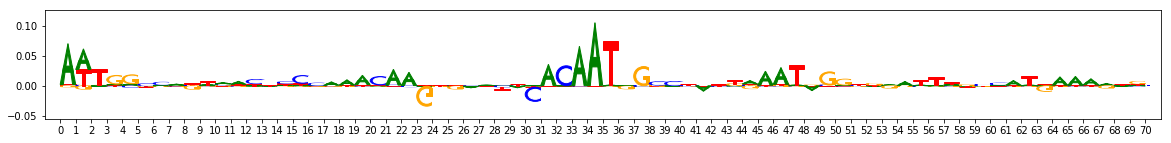

onehot, fwd and rev:


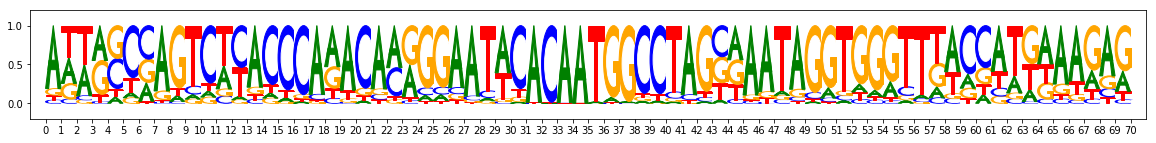

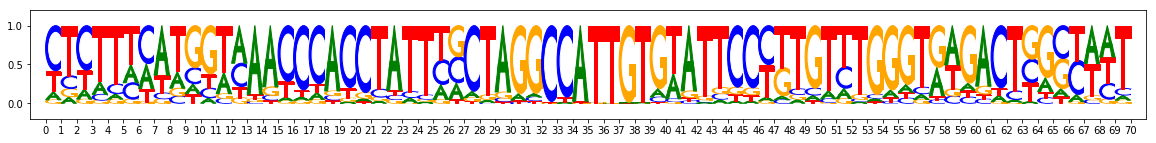

metacluster_0 pattern_9
total seqlets: 203
Task 0 hypothetical scores:


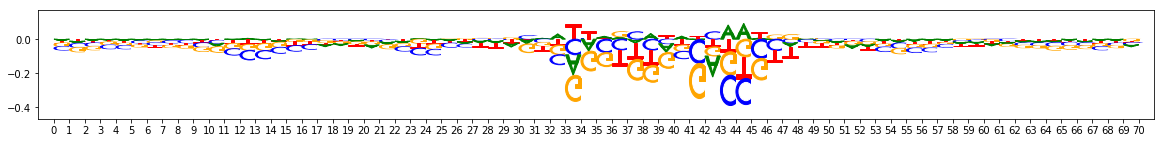

Task 0 actual importance scores:


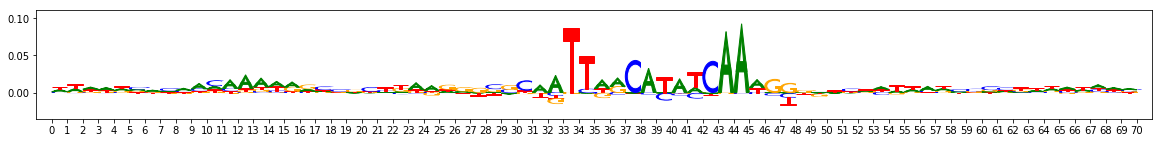

onehot, fwd and rev:


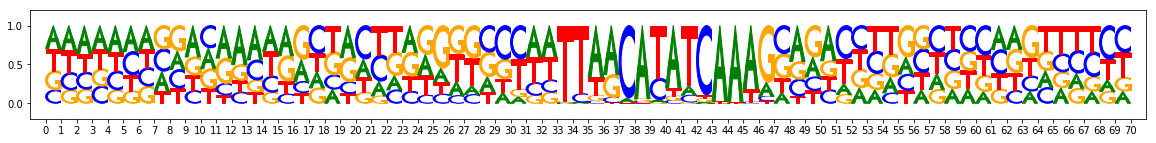

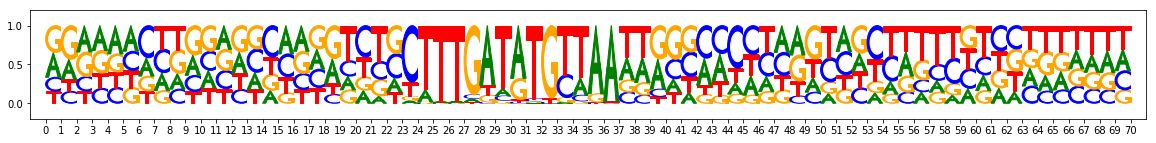

metacluster_0 pattern_10
total seqlets: 166
Task 0 hypothetical scores:


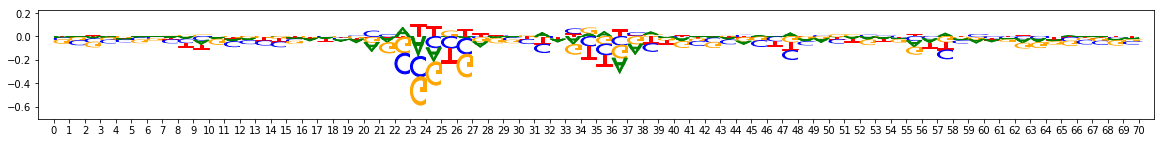

Task 0 actual importance scores:


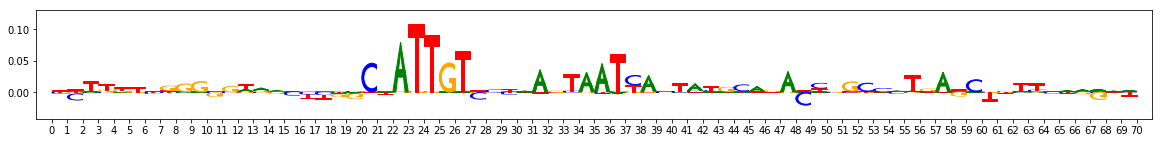

onehot, fwd and rev:


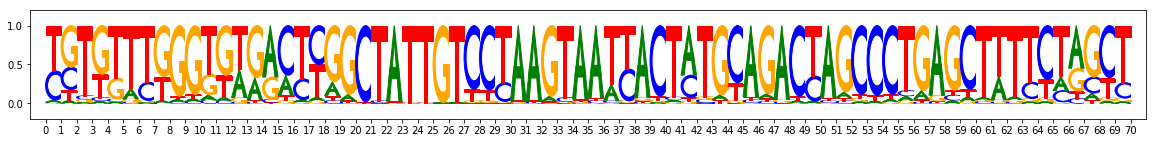

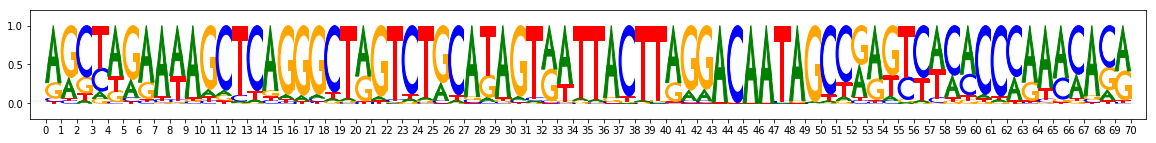

metacluster_0 pattern_11
total seqlets: 134
Task 0 hypothetical scores:


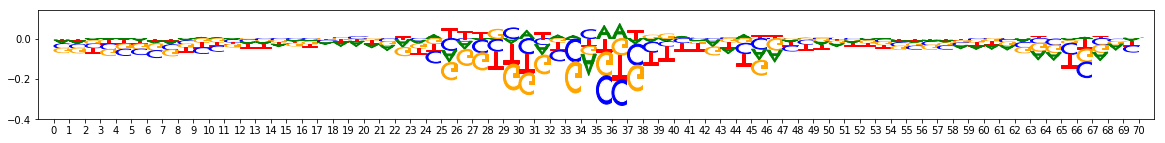

Task 0 actual importance scores:


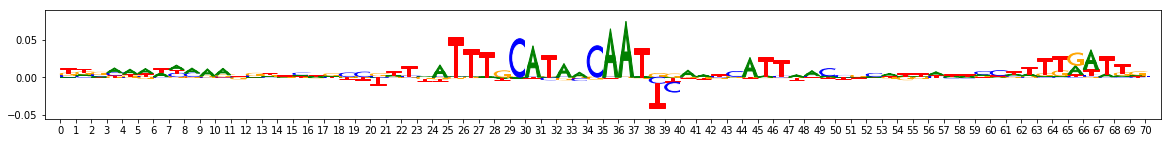

onehot, fwd and rev:


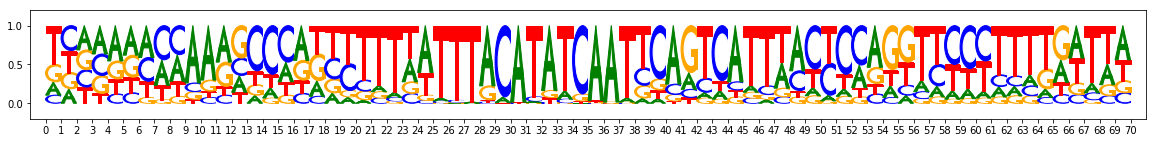

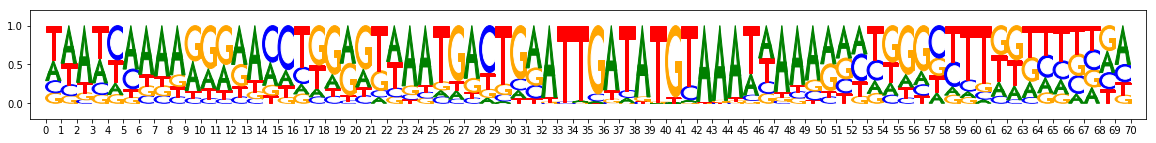

metacluster_0 pattern_12
total seqlets: 104
Task 0 hypothetical scores:


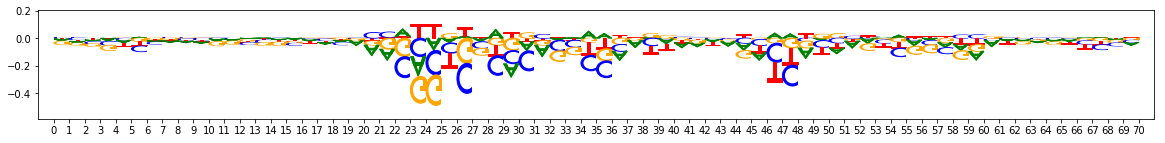

Task 0 actual importance scores:


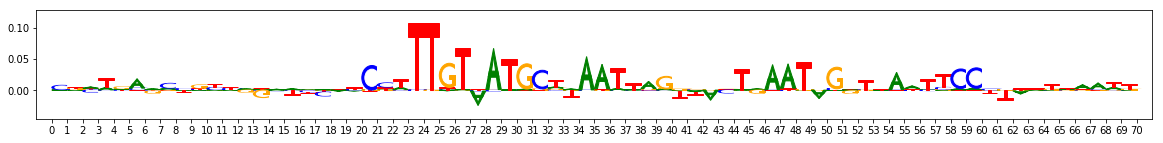

onehot, fwd and rev:


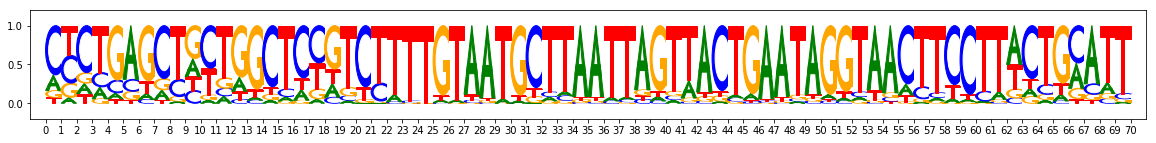

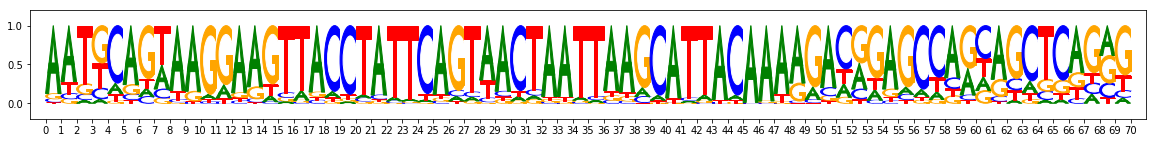

metacluster_0 pattern_13
total seqlets: 86
Task 0 hypothetical scores:


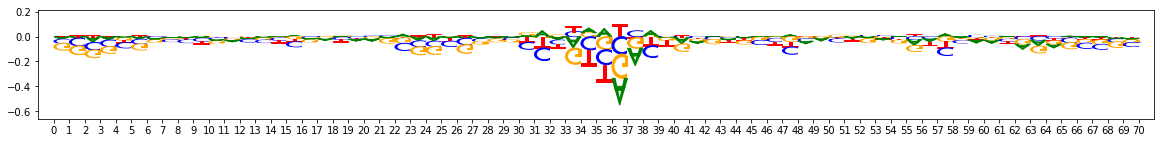

Task 0 actual importance scores:


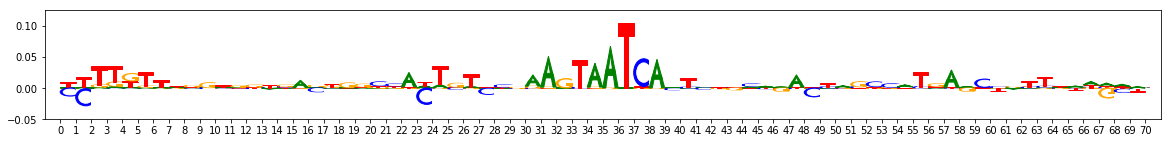

onehot, fwd and rev:


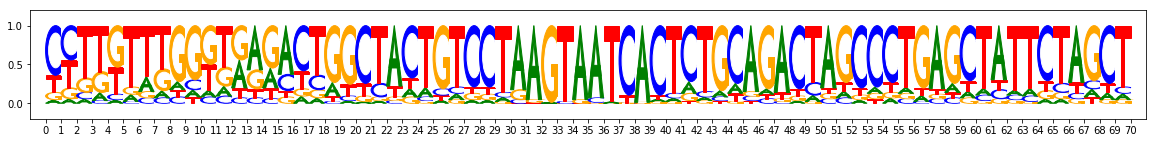

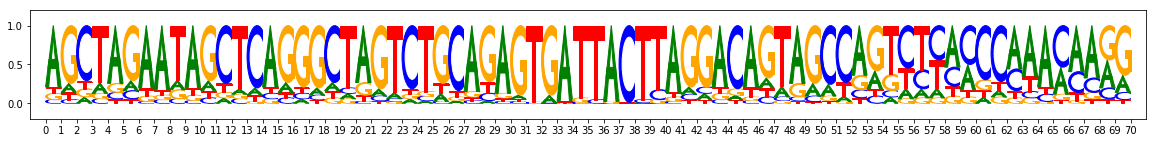

metacluster_0 pattern_14
total seqlets: 84
Task 0 hypothetical scores:


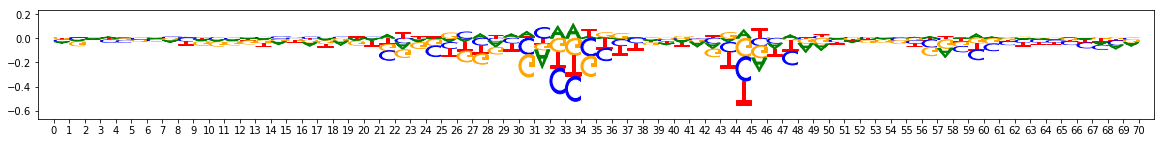

Task 0 actual importance scores:


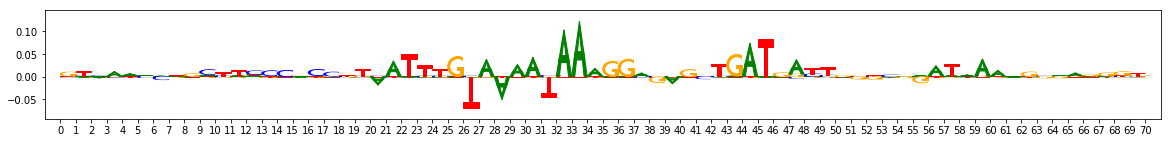

onehot, fwd and rev:


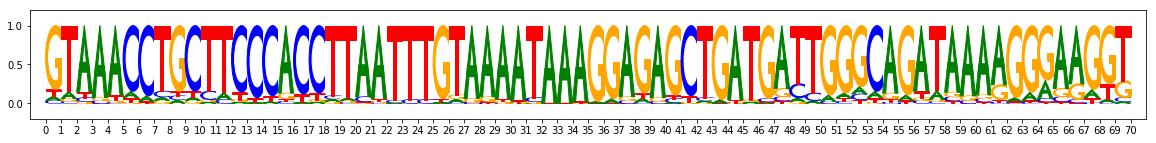

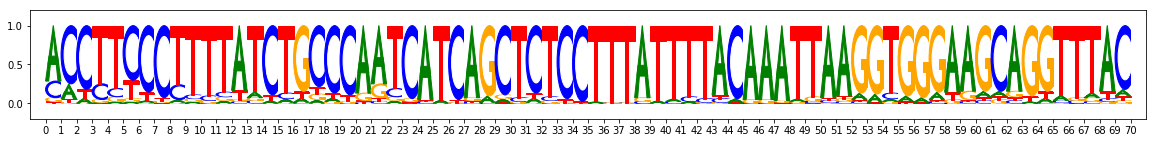

metacluster_0 pattern_15
total seqlets: 86
Task 0 hypothetical scores:


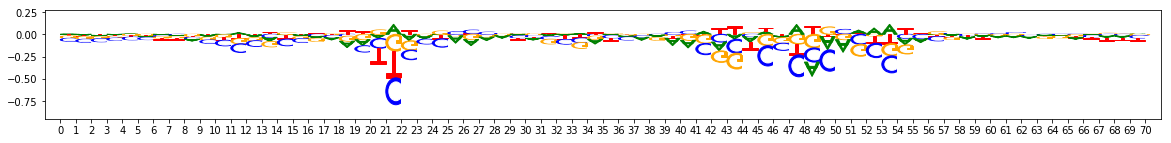

Task 0 actual importance scores:


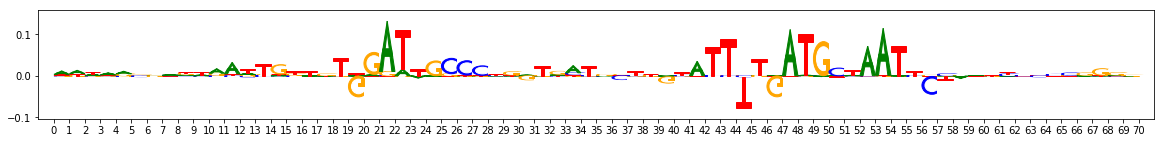

onehot, fwd and rev:


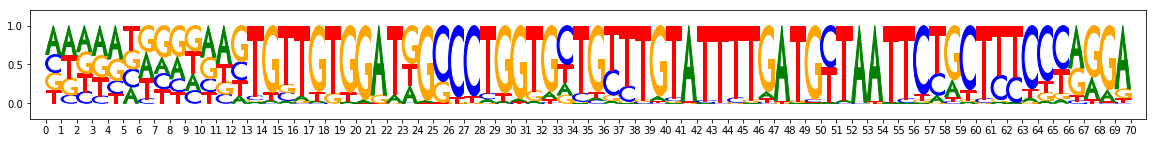

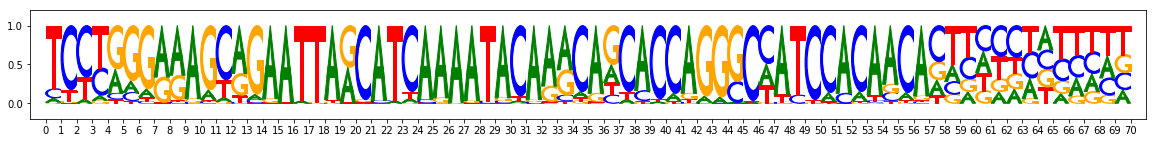

metacluster_0 pattern_16
total seqlets: 71
Task 0 hypothetical scores:


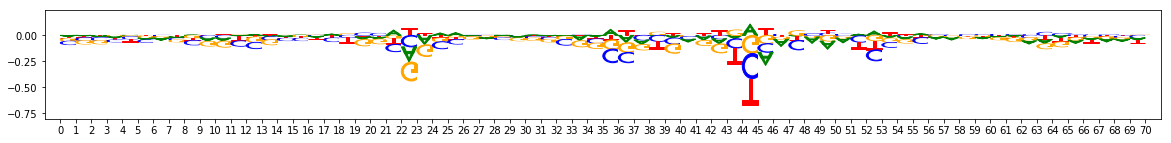

Task 0 actual importance scores:


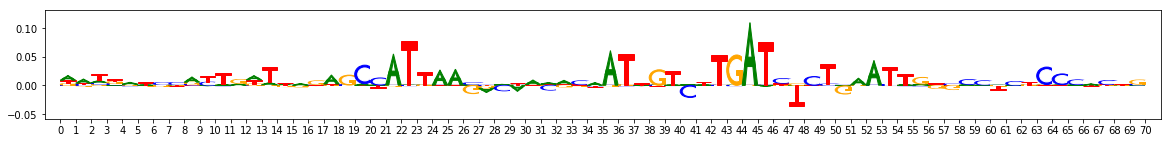

onehot, fwd and rev:


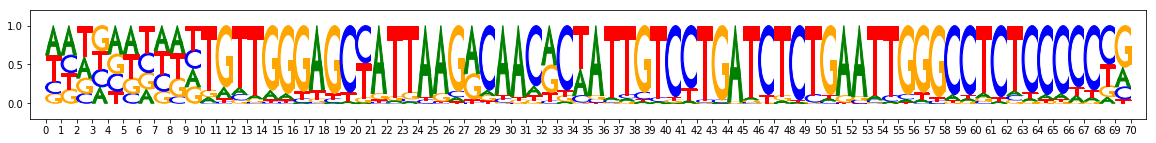

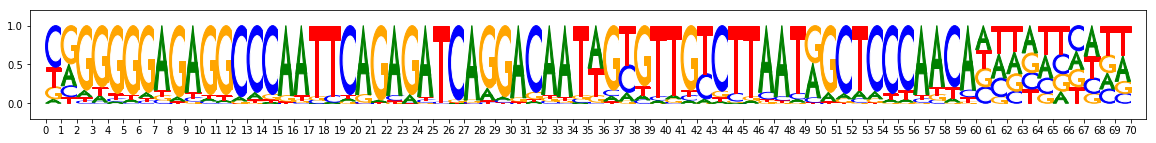

In [4]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File("sparserun_l6g2m0_results.hdf5","r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()